In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

C:\Users\twolf\AppData\Local\Temp\ipykernel_21028\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_21028\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_21028\17026926.py:3: SettingWithCopyWarning: 
A valu

In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

# Dataframe for Hover Taxi maneuver# 

In [6]:
df_h = df.copy()
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1


In [7]:
df_h['hover'].value_counts()

0    6206
1    1014
Name: hover, dtype: int64

# Edit DF for ML, Class Balance, Select desired features

In [8]:
#Edit the model features to whatever you want to include in your model
all_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque', 'hover']

df_h = df_h[all_features]

In [9]:
# 6206 0s
# 1014 1s

df_h['hover'].value_counts()

0    6206
1    1014
Name: hover, dtype: int64

In [10]:
df1 = df_h[(df_h['hover'] == 0)].sample(n=1014, replace=False, random_state=123458)
df2 = pd.concat([df_h[(df_h['hover'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [11]:
df2['hover'].value_counts()

0    1014
1    1014
Name: hover, dtype: int64

In [12]:
df2.head()

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
1418,0.0,579.009474,97.781605,109.873579,197.470395,2.109895,-37.196947,1.847816,50.109000,-0.863237,67.776632,83.502500,83.502500,0
775,0.0,5.148293,198.804317,17.805439,-20.639756,0.720829,-11.046561,-7.553171,41.011317,0.841024,51.426098,50.713268,50.713268,1
366,0.0,6.965610,209.461610,18.888439,10.510122,-0.032220,-15.659683,-12.644756,40.183756,-2.060049,51.316829,50.813463,50.813463,1
782,0.0,3.768462,198.264436,15.764282,-30.610103,-0.416949,-11.726231,-9.179872,41.175333,-2.540205,51.737923,51.402487,51.402487,1
195,0.0,84.078718,30.500103,30.618718,-38.385051,0.460410,-14.292487,-9.309026,39.816256,-4.692128,51.826641,51.620897,51.620897,1


# Random Forest Ensemble for Hover Taxi

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils import resample

In [95]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['hover']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [97]:
#RF
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rf = RandomForestClassifier(n_estimators = 150, max_features = 3)


rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'
     .format(rf.score(X_test, y_test)))



Accuracy of SVM classifier on training set: 0.94
Accuracy of SVM classifier on test set: 0.9239


In [98]:
y_pred=rf.predict(X_test)

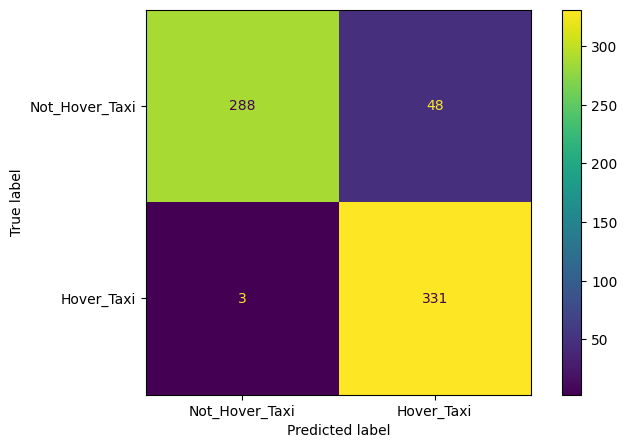

In [99]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Hover_Taxi', 'Hover_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [19]:
y_test.value_counts()

0    336
1    334
Name: hover, dtype: int64

In [20]:
y.value_counts()

0    1014
1    1014
Name: hover, dtype: int64

In [21]:
len(X)

2028

In [22]:
len(y)

2028